In [2]:
# Import the numpy module to provide numerical functionality
import numpy as np

# Import the matplotlib.pyplot module to provide plotting functionality
import matplotlib.pyplot as plt

# Tell matplotlib.pyplot to do inline plots
%matplotlib inline

# Import the mesa-web module to simplify reading MESA-Web files

import mesa_web as mw

In [11]:
# Read history data. Be sure to replace the MMDDNNNNNN with the
# specific digits of your folder

hist_data = mw.read_history('MESA-Web_Job_1008205501/trimmed_history.data')

# Inspect the hist_data variable

print(type(hist_data))
print(hist_data.keys())

<class 'dict'>
dict_keys(['version_number', 'compiler', 'build', 'MESA_SDK_version', 'date', 'burn_min1', 'burn_min2', 'model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius', 'o_core_radius', 'si_core_radius', 'fe_core_radius', 'max_abs_v_velocity', 'surf_avg_omega_div_omega_crit', 'log_total_angular_momentum', 'surf_avg_omega', 'surf_avg_v_rot', 'star_mdot']

In [12]:
# Print out documentation for the read_history function

help(mw.read_history)


Help on function read_history in module mesa_web:

read_history(filename)
    Read data from a MESA-Web history file
    
    Parameters
    ----------
    
    filename : string giving name of history file
    
    Returns
    -------
    
    hist_data: dict containing header and history data (see below for
               details)
    
    Header Data 
    -----------
    
    The following keys/value pairs in the data dict contain header
    data -- i.e., scalars describing time-independent properties of
    the star. Where applicable, units are given in square brackets [].
    
      version_number -- version number of MESA
      initial_mass   -- initial mass [Msun]
      initial_z      -- initial metal mass fraction
      burn_min1      -- 1st limit for reported burning [erg/g/s]
      burn_min2      -- 2nd limit for reported burning [erg/g/s]
    
    History Data
    ------------
    
    The following keys/value pairs in the data dict contain history
    data -- i.e., arrays d

Text(0.5, 1.0, 'Hertzsprung-Russel Diagram for Sun')

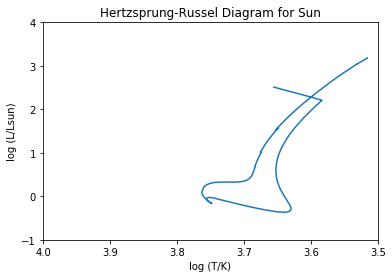

In [15]:
# Extract data from hist_data, using dict indexing

log_Teff = hist_data['log_Teff'] # log(Teff/K)
log_L = hist_data['log_L']       # log(L/Lsun)

# Create the HR diagram

plt.figure()

plt.plot(log_Teff, log_L)

plt.xlim(4.0, 3.5)
plt.ylim(-1,4)

plt.xlabel('log (T/K)')
plt.ylabel('log (L/Lsun)')

plt.title('Hertzsprung-Russel Diagram for Sun')

In [32]:
# Extract log(LH) from hist_data

log_LH = hist_data['log_LH']

# Find where log(LH) is closest to zero (i.e., LH closest to 1 Lsun),
# as representative of the present-day Sun. The np.abs() function 
# returns the absolute value. The np.argmin() function returns the 
# index of the smallest element

i_pres = np.argmin(np.abs(log_LH))

print(i_pres)

# Print out values at this index

print('log(L_H) at present     :', log_LH[i_pres])
print('log(L) at present       :', log_L[i_pres])
print('log(Teff) at present    :', log_Teff[i_pres])
print('log(R) at present       :', hist_data['log_R'][i_pres])
print('Model number at present :', hist_data['model_number'][i_pres])

297
log(L_H) at present     : 0.0010016883770744924
log(L) at present       : 0.0009110072324429323
log(Teff) at present    : 3.760364770917345
log(R) at present       : 0.0029847982341584044
Model number at present : 298


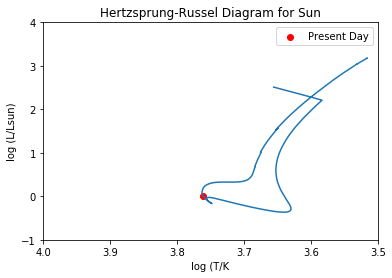

In [30]:
# Create the HR diagram with the present-day Sun

plt.figure()

plt.plot(log_Teff, log_L)

plt.scatter(log_Teff[i_pres], log_L[i_pres], color='r', label='Present Day')

plt.xlim(4.0, 3.5)
plt.ylim(-1,4)

plt.xlabel('log (T/K')
plt.ylabel('log (L/Lsun)')

plt.title('Hertzsprung-Russel Diagram for Sun')

plt.legend()

Text(0.5, 0, 'Age (Gyr)')

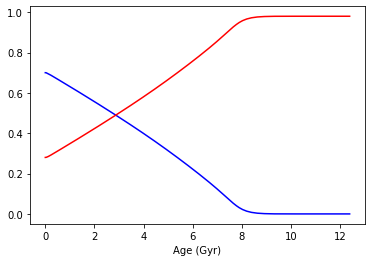

In [35]:
# Plot central hydrogen abundance versus age (measured since the
# start of the calculation)

X_c = hist_data['center_h1']
Y_c = hist_data['center_he4']
age = hist_data['star_age']

plt.figure()

plt.plot(age/1E9, X_c, color='b', label='X')
plt.plot(age/1E9, Y_c, color='r', label='Y')

plt.xlabel('Age (Gyr)')


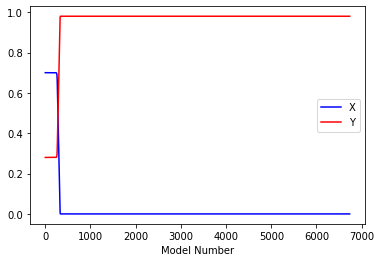

In [34]:
# Plot central hydrogen abundance versus model number

X_c = hist_data['center_h1']
Y_c = hist_data['center_he4']
mod_num = hist_data['model_number']

plt.figure()

plt.plot(mod_num, X_c, color='b', label='X')
plt.plot(mod_num, Y_c, color='r', label='Y')

plt.xlabel('Model Number')

plt.legend()
